In [2]:
# Librerías
import numpy as np
import pandas as pd; pd.set_option('display.max_columns', 500)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import plotly
import scipy as sp
import cufflinks as cf
cf.go_offline()
from tqdm import tqdm

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (14, 6)

In [9]:
# Fuente: https://www.kaggle.com/lava18/google-play-store-apps
df = pd.read_csv('googleplaystore.csv')
print(df.shape)
df.head()

(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
# Remover duplicados
df.drop_duplicates('App', inplace=True)
df.set_index('App', inplace=True)
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### NaNs

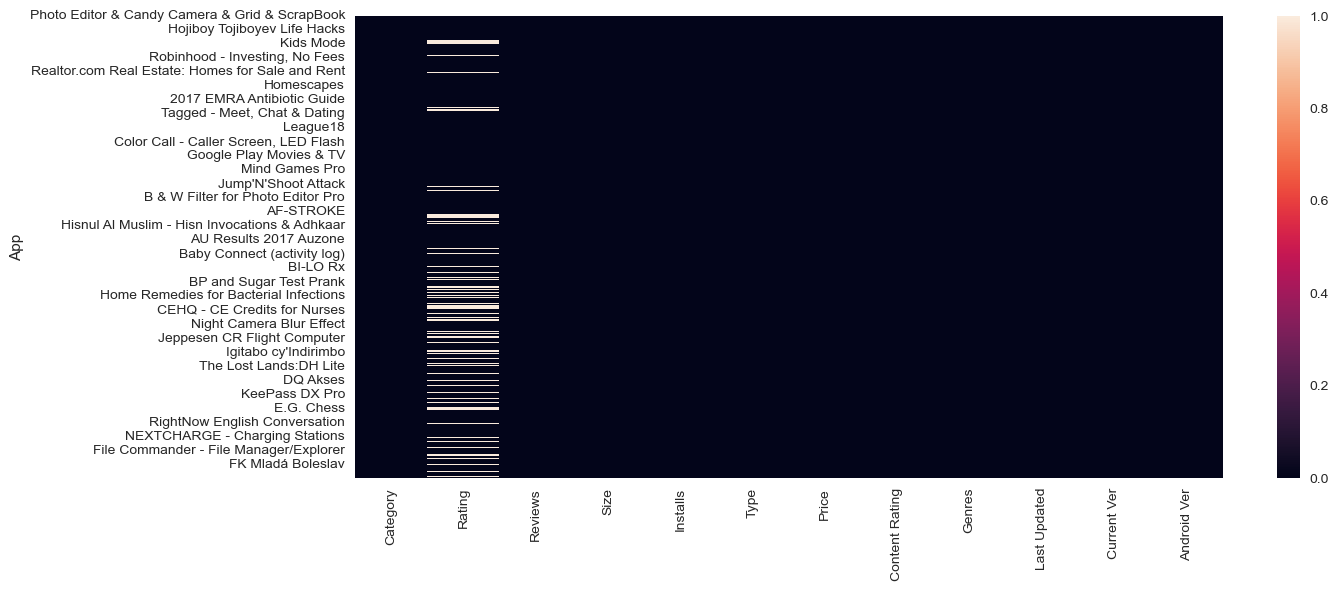

In [11]:
# Dónde faltan valores?
plt.figure()
sns.heatmap(df.isna(), vmin = 0, vmax=1)
plt.show()

In [14]:
# Removemos los nulos
df = df.dropna()
df.shape

(8190, 12)

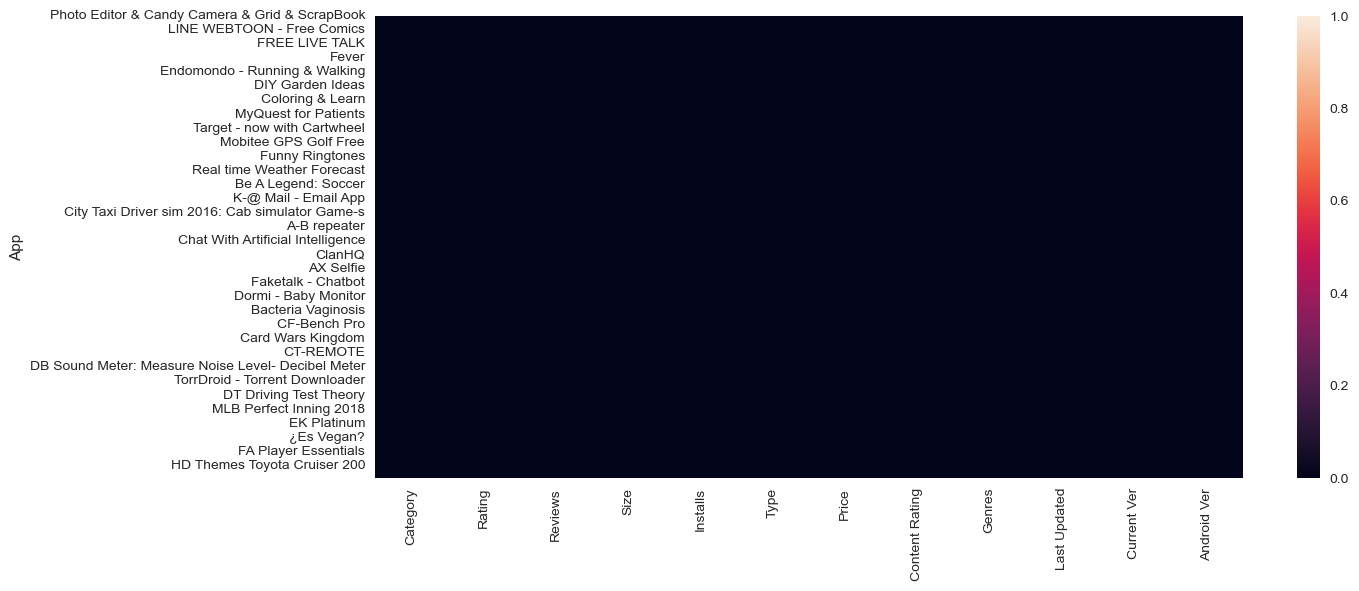

In [15]:
# Ahora no deberían faltar valores
plt.figure()
sns.heatmap(df.isna(), vmin = 0, vmax=1)
plt.show()

In [16]:
# Cuántas son pagas y cuántas gratis?
df.Price = df.Price.apply(lambda x: x[1:] if x[0] == '$' else x).astype(float)
df.Type.value_counts().iplot(kind='bar')

In [18]:
# Remuevo las gratis
df = df[df.Price > 0]
df.shape

(602, 12)

### Variable Puntajes

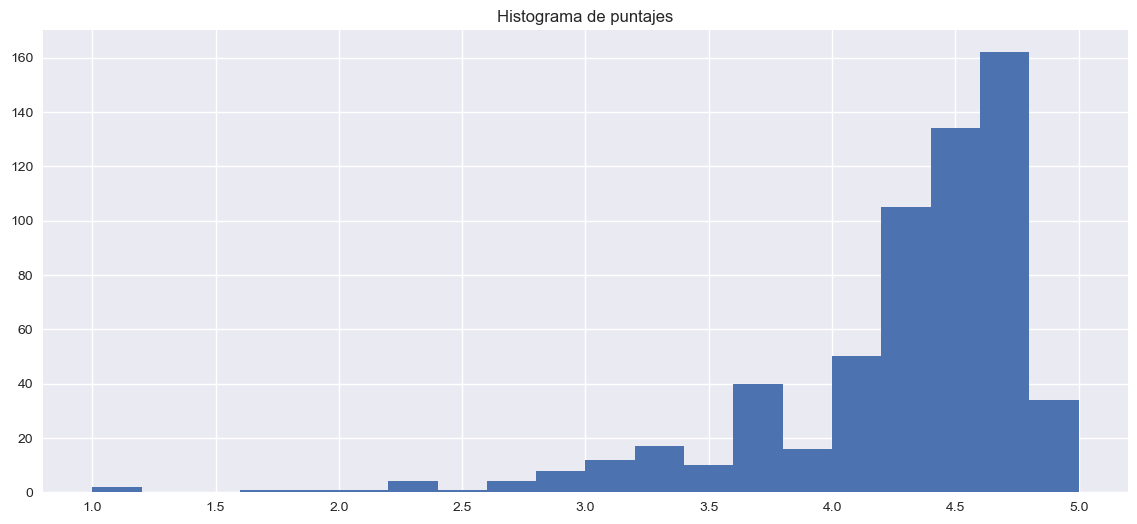

In [19]:
df.Rating.hist(bins=20)
plt.title('Histograma de puntajes')
plt.show()

### Variable Tamaño

In [20]:
df.Size.value_counts()

Varies with device    63
23M                   13
20M                   11
1.2M                  10
26M                   10
                      ..
9.1M                   1
6.4M                   1
8.9M                   1
51k                    1
861k                   1
Name: Size, Length: 201, dtype: int64

In [22]:
# Remuevo los valores no númericos y convierto texto a número
df = df[df.Size != 'Varies with device']
df.Size = df.Size.apply(lambda x: float(x[:-1])/1000 if x[-1]=='k' else float(x[:-1]))

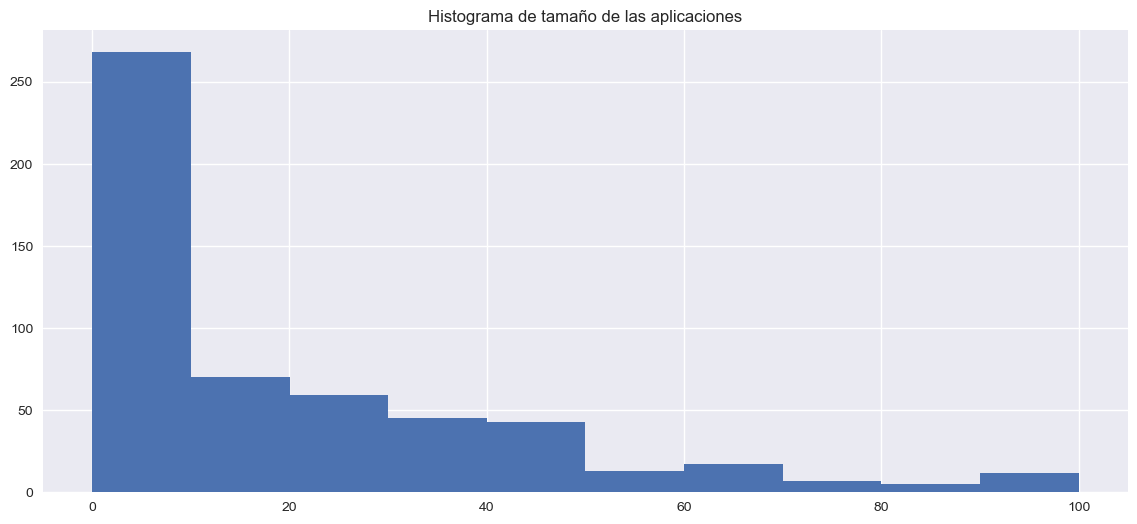

In [23]:
df.Size.hist()
plt.title('Histograma de tamaño de las aplicaciones')
plt.show()

### Variable Descargas

In [24]:
df.Installs.value_counts()

1,000+         123
10,000+        103
100+            64
100,000+        63
5,000+          58
500+            35
50,000+         30
1,000,000+      18
10+             18
50+             14
500,000+        10
1+               2
10,000,000+      1
Name: Installs, dtype: int64

In [25]:
# Convierto texto a número
df.Installs = df.Installs.apply(lambda x: x[:-1].replace(',', '')).astype(int)

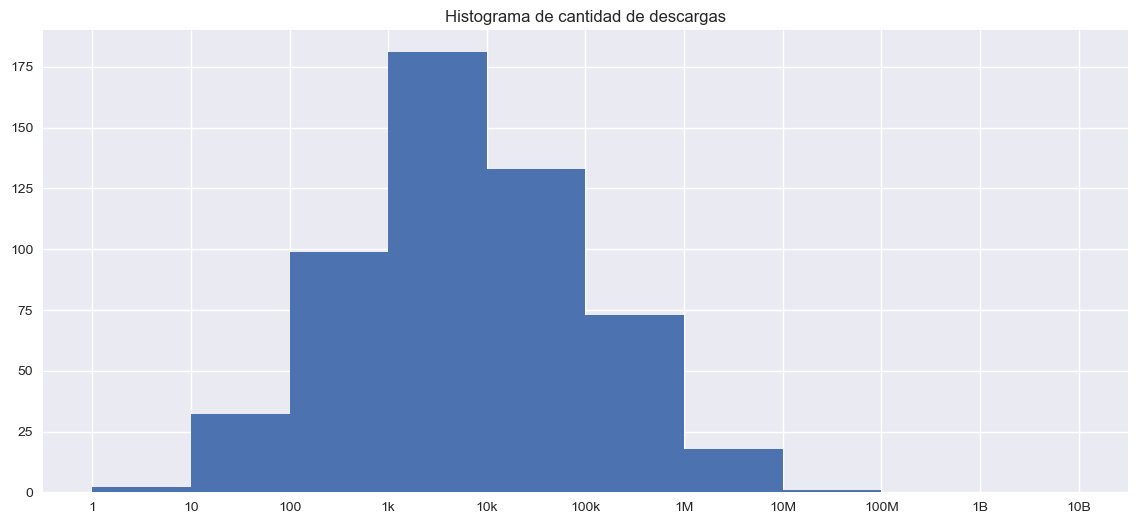

In [28]:
fix, ax = plt.subplots()
df.Installs.hist(ax=ax,
                 bins=np.logspace(0, np.log10(10**10), 11))
ax.set_xscale('log')
ax.set_xticks(np.logspace(0, np.log10(10**10), 11))
ax.set_xticklabels(['1', '10', '100', '1k', '10k', '100k', '1M', '10M', '100M', '1B', '10B'])
plt.title('Histograma de cantidad de descargas')
plt.show()

In [29]:
# Apps con más de 10 millones de descargas
df[df.Installs>=10000000]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Hitman Sniper,GAME,4.6,408292,29.0,10000000,Paid,0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up


### Variable Reseñas

In [30]:
# Convierto texto a número
df.Reviews = df.Reviews.astype(int)

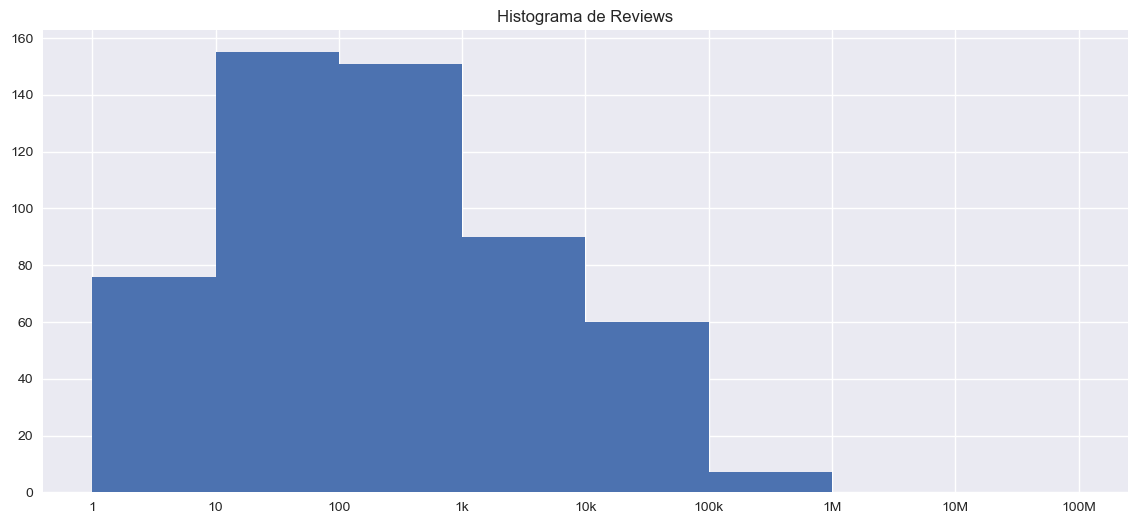

In [33]:
fix, ax = plt.subplots()
df.Reviews.hist(ax=ax, 
                bins=np.logspace(0, np.log10(10**8), 9))
ax.set_xscale('log')
ax.set_xticks(np.logspace(0, np.log10(10**8), 9))
ax.set_xticklabels(['1', '10', '100', '1k', '10k', '100k', '1M', '10M', '100M'])
plt.title('Histograma de Reviews')
plt.show()

### Precios

Text(0.5, 1.0, 'Histograma de precios')

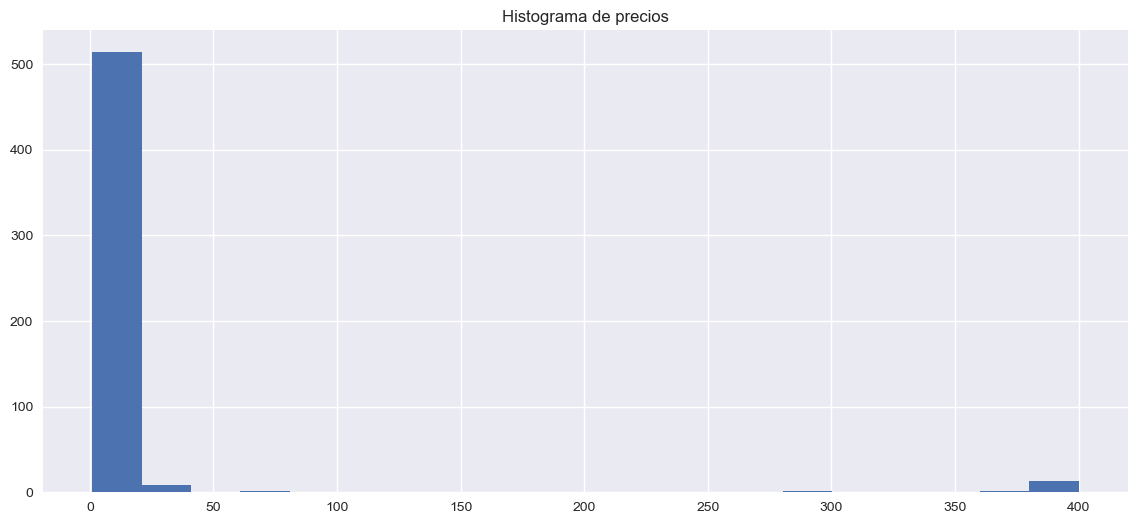

In [34]:
df.Price[df.Price > 0].hist(bins=20)
plt.title('Histograma de precios')

In [37]:
# Qué aplicaciones salen más de 100?
display(df[df.Price>=100])
# Aplicaciones hechas en broma. Por lo tanto las filtro.
df = df[(df.Price < 100) & (df.Price > 0)]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
most expensive app (H),FAMILY,4.3,6,1.500,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
💎 I'm rich,LIFESTYLE,3.8,718,26.000,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.300,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
I am rich,LIFESTYLE,3.8,3547,1.800,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
I am Rich Plus,FAMILY,4.0,856,8.700,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
I am rich VIP,LIFESTYLE,3.8,411,2.600,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
I Am Rich Premium,FINANCE,4.1,1867,4.700,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
I am extremely Rich,LIFESTYLE,2.9,41,2.900,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
I am Rich!,FINANCE,3.8,93,22.000,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up


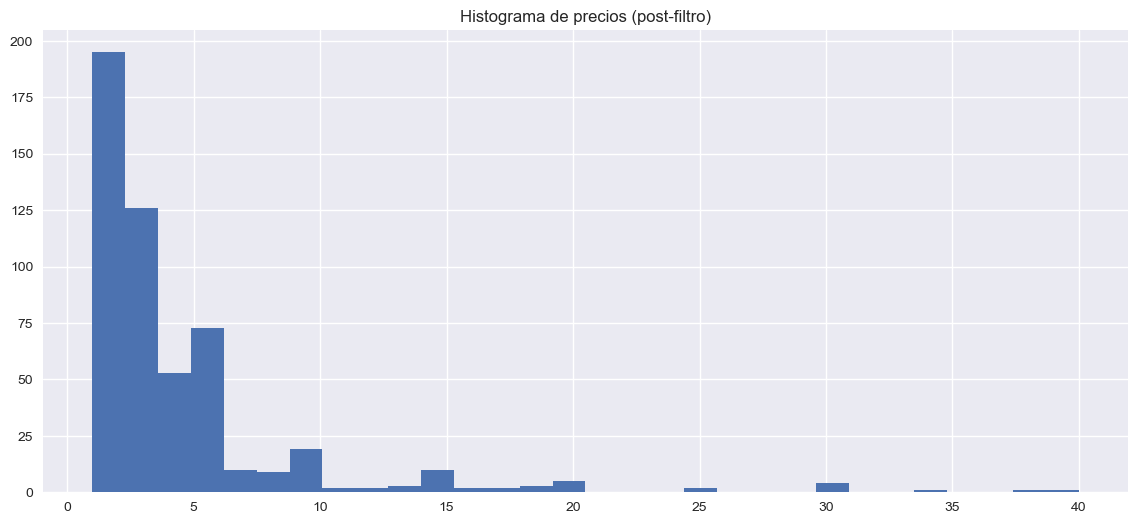

In [39]:
plt.figure()
df.Price[(df.Price > 0) & (df.Price < 50)].hist(log=False, bins=30)
plt.title('Histograma de precios (post-filtro)');

## Pre-PCA, escalamiento

In [40]:
# Creo nueva variable "recaudación"
df['Earnings'] = df['Price']*df['Installs']

In [41]:
# Filtro mi tabla para que solo contenga datos numéricos
df_numbers = df['Rating,Size,Reviews,Installs,Price,Earnings'.split(',')]

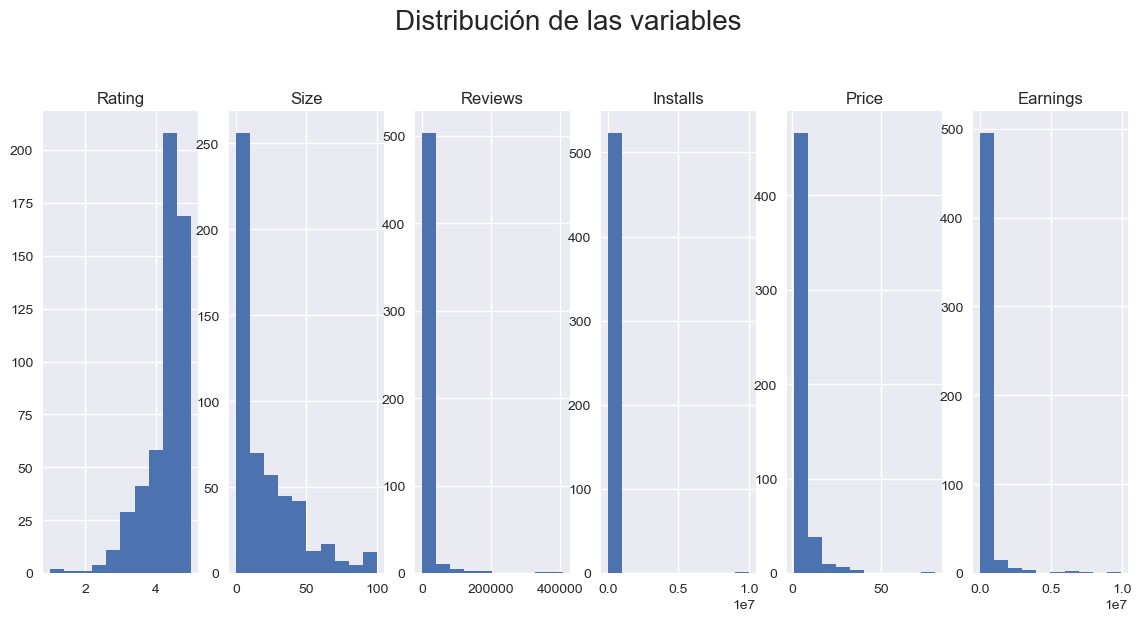

In [42]:
fig, axs = plt.subplots(1, df_numbers.shape[1],)
for i, ax in enumerate(axs):
    ax.hist(df_numbers.iloc[:, i])
    ax.set_title(df_numbers.columns[i])
fig.suptitle('Distribución de las variables', fontsize=20, y=1.05)
plt.show()

In [44]:
# Muestra
df_numbers.sample(5)

,Rating,Size,Reviews,Installs,Price,Earnings
App,,,,,,
R Instructor,4.1,4.9,135,1000,4.84,4840.0
G-Force Driving Assistant,4.6,6.1,10,100,3.88,388.0
Oddworld: New 'n' Tasty,4.6,34.0,1475,10000,4.99,49900.0
Mupen64Plus AE (N64 Emulator),4.2,12.0,4569,100000,0.99,99000.0
iHunter BC,4.4,63.0,55,1000,4.49,4490.0


In [45]:
# Log scaling y normalización manual
df_numbers = df_numbers.apply(lambda x:np.log10(x+1))
df_numbers = (df_numbers - df_numbers.mean())/df_numbers.std(ddof=1)

In [46]:
# Muestra después de escalar
df_numbers.head(5)

,Rating,Size,Reviews,Installs,Price,Earnings
App,,,,,,
TurboScan: scan documents and receipts in PDF,0.695175,-0.301628,1.406422,1.252797,0.533465,1.347098
Tiny Scanner Pro: PDF Doc Scan,0.832000,1.008645,1.368750,1.252797,0.533465,1.347098
Calculator,-2.920058,-0.365783,-0.478417,-0.418903,0.983276,-0.105375
AMBW Dating App: Asian Men Black Women Interracial,-1.164543,0.368633,-1.534785,-1.251682,1.167389,-0.843106
Sago Mini Hat Maker,0.966485,1.385358,-1.040348,-0.418903,0.248284,-0.296152


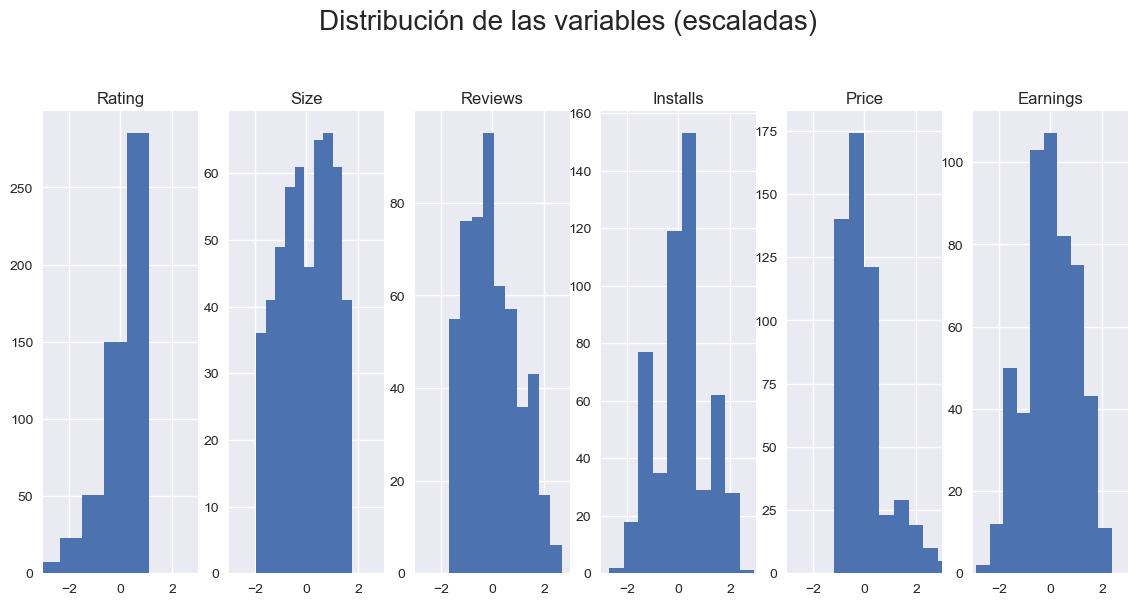

In [47]:
fig, axs = plt.subplots(1, df_numbers.shape[1],)
for i, ax in enumerate(axs):
    ax.hist(df_numbers.iloc[:, i])
    ax.set_title(df_numbers.columns[i])
    ax.set_xlim(-3, 3)
fig.suptitle('Distribución de las variables (escaladas)', fontsize=20, y=1.05)
plt.show()

## PCA

In [48]:
# Calculo la matriz de covarianzas
A = np.dot(df_numbers.values.T, df_numbers.values)/(len(df_numbers))
pd.DataFrame(A, columns = df_numbers.columns, index = df_numbers.columns)

,Rating,Size,Reviews,Installs,Price,Earnings
Rating,0.998092,0.137035,0.195613,0.121695,-0.034768,0.103756
Size,0.137035,0.998092,0.230138,0.218317,0.023402,0.211033
Reviews,0.195613,0.230138,0.998092,0.935634,0.054695,0.898503
Installs,0.121695,0.218317,0.935634,0.998092,0.053634,0.957579
Price,-0.034768,0.023402,0.054695,0.053634,0.998092,0.330795
Earnings,0.103756,0.211033,0.898503,0.957579,0.330795,0.998092


In [50]:
# Calculo los autovectores y autovalores
avals, avecs = np.linalg.eigh(A, 'U')
avecs = avecs.T
avecs = avecs[::-1]
avals = avals[::-1]
avals, avecs

(array([3.00028849e+00, 1.10725238e+00, 9.53470661e-01, 8.50549721e-01,
        7.64981796e-02, 4.90193029e-04]),
 array([[ 1.28009822e-01,  1.93632965e-01,  5.51119312e-01,
          5.58370113e-01,  1.22856227e-01,  5.61708491e-01],
        [ 6.19779031e-01,  3.91551183e-01,  5.60098446e-02,
         -2.15236180e-03, -6.51639888e-01, -1.86508298e-01],
        [ 4.09916307e-01,  5.18143912e-01, -1.82473086e-01,
         -2.25516922e-01,  6.92050337e-01, -2.01873364e-02],
        [ 6.53318192e-01, -7.35296009e-01,  3.78861446e-02,
         -9.63449946e-03,  1.71549101e-01,  3.94695057e-02],
        [ 6.80520184e-02,  7.69738954e-03, -8.11406459e-01,
          4.25822725e-01, -1.10205053e-01,  3.78759930e-01],
        [-5.67962429e-04, -1.16672393e-03, -4.26287727e-03,
          6.75235134e-01,  1.99408844e-01, -7.10122364e-01]]))

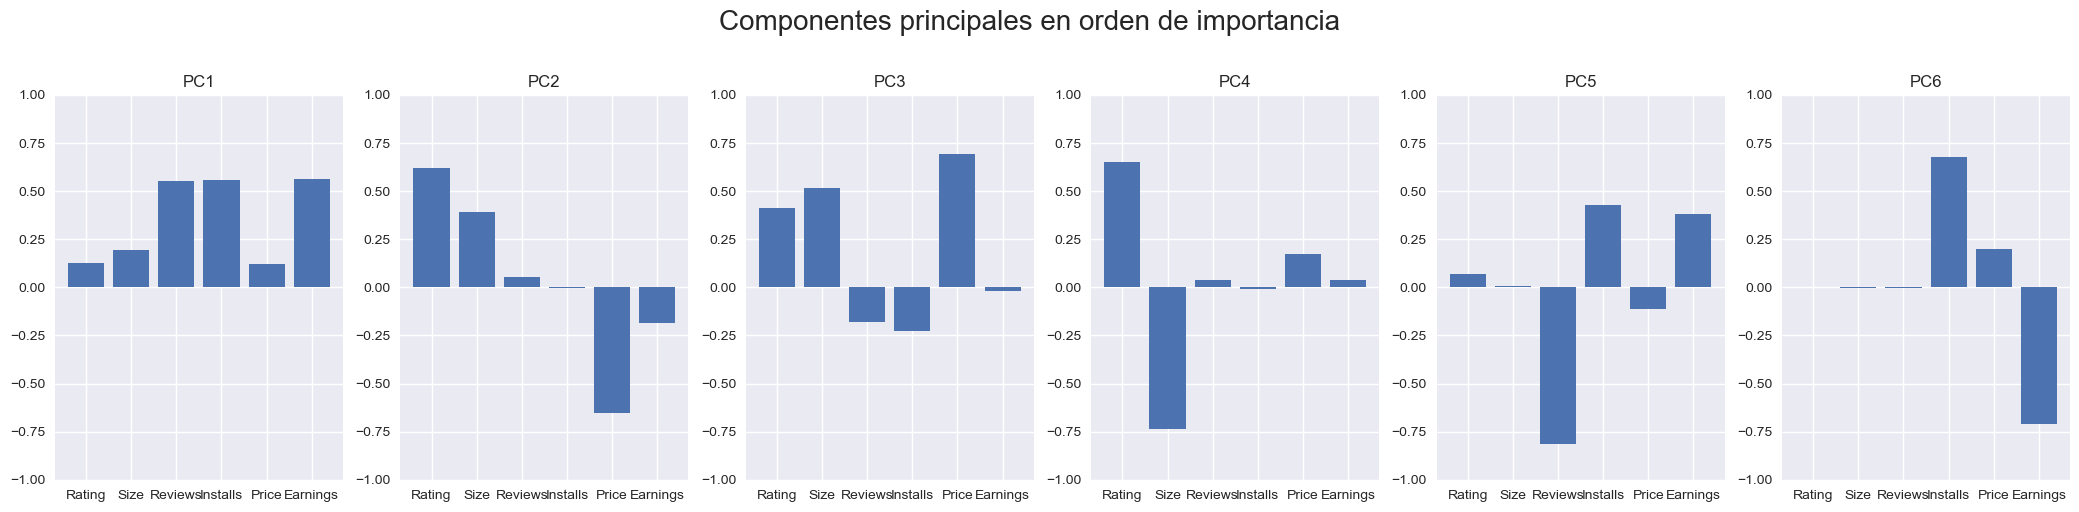

In [51]:
fig, axs = plt.subplots(1, len(avals), figsize=(26, 5))
for i, ax in enumerate(axs):
    ax.bar(df_numbers.columns, avecs[i])
    ax.set_ylim(-1, 1)
    ax.set_title('PC'+str(i+1))
fig.suptitle('Componentes principales en orden de importancia', fontsize=20, y=1.05)
plt.show()

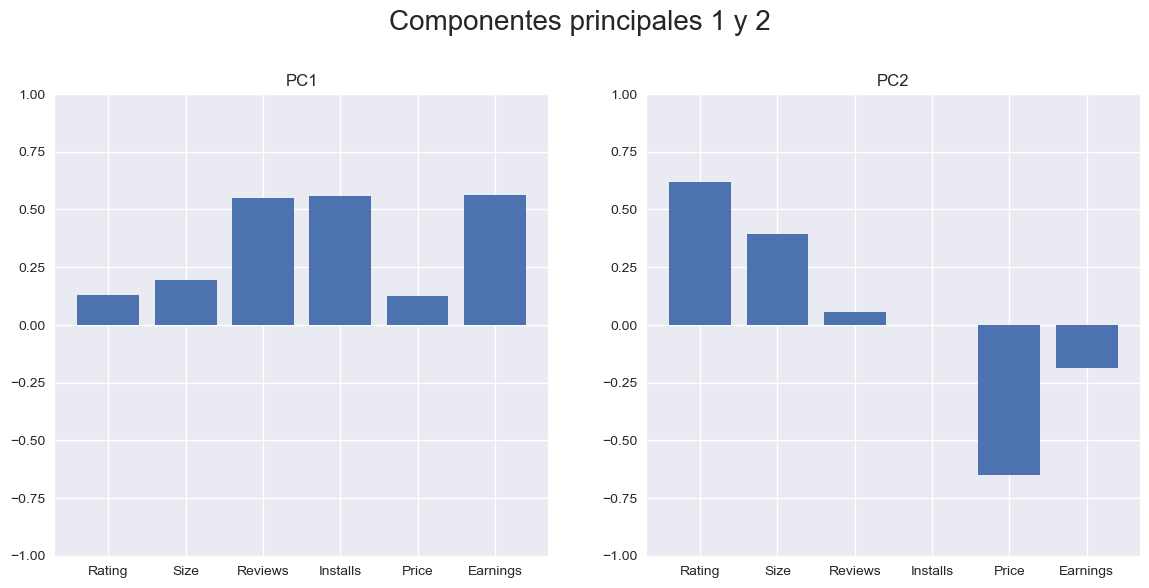

In [52]:
fig, axs = plt.subplots(1, 2)
for i, ax in enumerate(axs):
    ax.bar(df_numbers.columns, avecs[i])
    ax.set_ylim(-1, 1)
    ax.set_title('PC'+str(i+1))
fig.suptitle('Componentes principales 1 y 2', fontsize=20, y=1.02)
plt.show()

In [53]:
# Hallo la combinación lineal de autovectores que llevan a los datos
# Los junto en una matriz (puntos_pca) para graficar luego
means = df_numbers.values.mean(0)
puntos_pca = []
for i in range(len(df_numbers)):
    puntos_pca.append( np.linalg.solve(avecs.T, (df_numbers.values[i] - means)) )
puntos_pca = np.array(puntos_pca)
puntos_pca

array([[ 2.3274304 , -0.21004274, -0.06849352,  0.86185527, -0.11128799,
        -0.01033243],
       [ 2.57789587,  0.38568713,  0.67337706, -0.01362069, -0.06132429,
        -0.01177828],
       [-0.88058019, -2.59999677, -0.52213585, -1.4883367 , -0.13999285,
        -0.00782985],
       ...,
       [-0.63426063, -0.99643662,  0.63138145,  1.06479337,  0.20741841,
        -0.00381027],
       [ 1.01017056, -2.03760962,  1.18847028, -0.03867157,  0.21838602,
         0.03409059],
       [ 0.49749226,  0.65118504, -0.97279184, -0.1238248 , -0.21597626,
         0.0174908 ]])

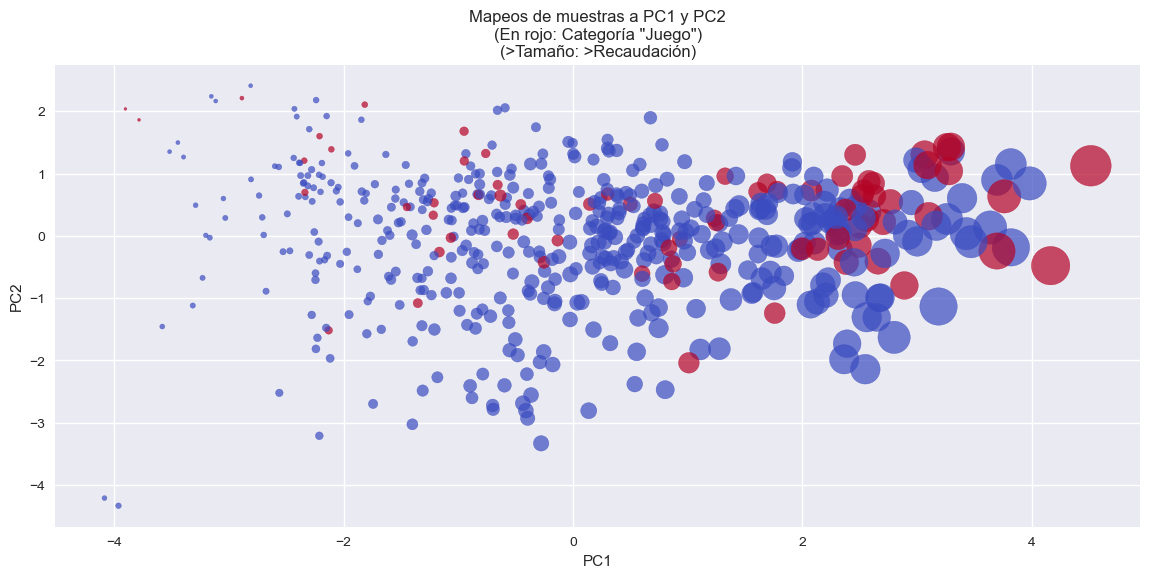

In [54]:
fig, ax = plt.subplots()
plt.scatter(puntos_pca[:, 0], 
        puntos_pca[:, 1], 
        c = (df['Category'] == 'GAME'),
        s = ((df['Earnings'])**(1/3)*4),
        alpha = 0.7,
        cmap='coolwarm')
# ax.set_xlim(-20, 20)
# ax.set_ylim(30, 80)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.title('Mapeos de muestras a PC1 y PC2\n(En rojo: Categoría "Juego")\n(>Tamaño: >Recaudación)')
plt.show()

In [55]:
# Gráfico interactivo
import plotly.express as px
px.scatter(x=puntos_pca[:, 0], 
        y=puntos_pca[:, 1], 
        color = df['Category'],
        size = ((df['Earnings'])**(1/3)*4),
        hover_name=df.reset_index().App)
# ax.set_xlim(-20, 20)
# ax.set_ylim(30, 80)
# ax.set_xlabel('PC1')
# ax.set_ylabel('PC2')
# plt.title('Mapeos de muestras a PC1 y PC2')

In [56]:
# Categorías
df['Category'].value_counts()

FAMILY                 139
GAME                    74
PERSONALIZATION         61
TOOLS                   55
MEDICAL                 54
SPORTS                  20
COMMUNICATION           18
PRODUCTIVITY            14
PHOTOGRAPHY             13
LIFESTYLE               11
BUSINESS                 8
HEALTH_AND_FITNESS       8
BOOKS_AND_REFERENCE      7
FINANCE                  7
WEATHER                  6
TRAVEL_AND_LOCAL         6
EDUCATION                4
MAPS_AND_NAVIGATION      4
ART_AND_DESIGN           3
DATING                   2
NEWS_AND_MAGAZINES       2
SHOPPING                 2
SOCIAL                   2
FOOD_AND_DRINK           1
ENTERTAINMENT            1
PARENTING                1
VIDEO_PLAYERS            1
Name: Category, dtype: int64

# Comprobación con scikit-learn

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=len(avals))
sk_pca = pca.fit_transform(df_numbers)
sk_pca
pca.components_[0], pca.components_[1]

(array([0.12800982, 0.19363297, 0.55111931, 0.55837011, 0.12285623,
        0.56170849]),
 array([-0.61977903, -0.39155118, -0.05600984,  0.00215236,  0.65163989,
         0.1865083 ]))

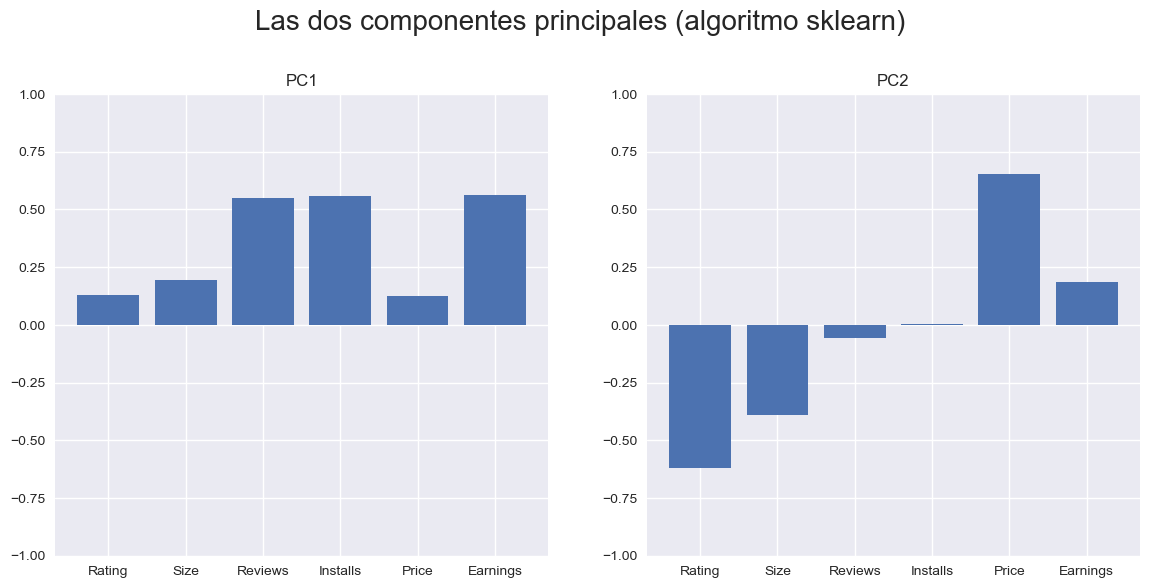

In [58]:
fig, axs = plt.subplots(1, 2)
for i, ax in enumerate(axs):
    ax.bar(df_numbers.columns, pca.components_[i])
    ax.set_ylim(-1, 1)
    ax.set_title('PC'+str(i+1))
fig.suptitle('Las dos componentes principales (algoritmo sklearn)', fontsize=20, y=1.02)
plt.show()

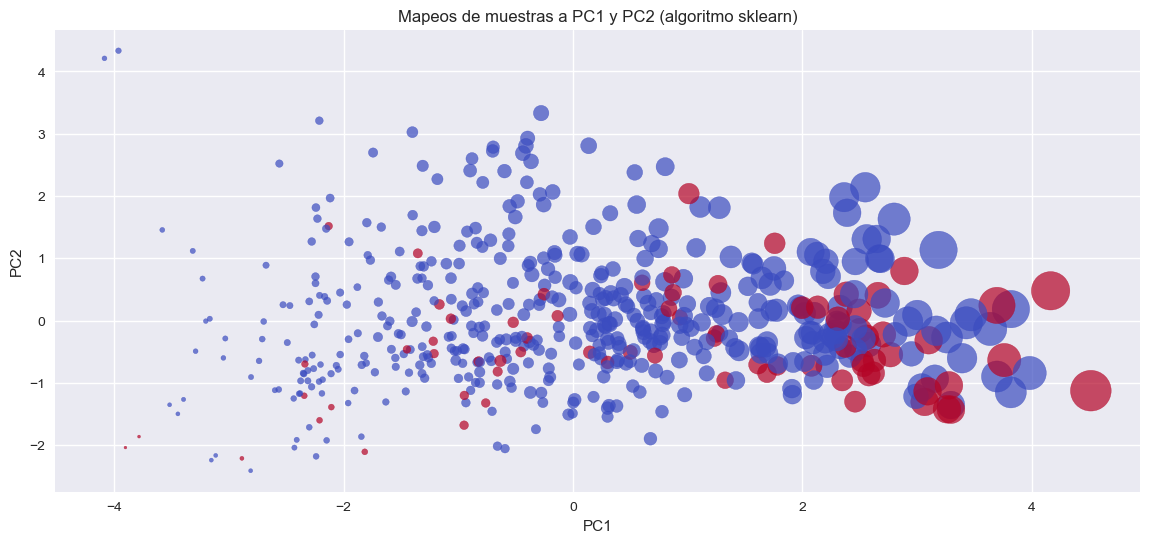

In [59]:
fig, ax = plt.subplots()
plt.scatter(sk_pca[:, 0], 
        sk_pca[:, 1], 
        c = (df['Category'] == 'GAME'),
        s = ((df['Earnings'])**(1/3)*4),
        alpha = 0.7,
        cmap='coolwarm')
# ax.set_xlim(-20, 20)
# ax.set_ylim(30, 80)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.title('Mapeos de muestras a PC1 y PC2 (algoritmo sklearn)')
plt.show()